# 1. Gradient Descent & Linear regression model

### 선형 모델을 사전에 가정

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from IPython.display import Image
width=700; height=500

C:\Users\NFSI291\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


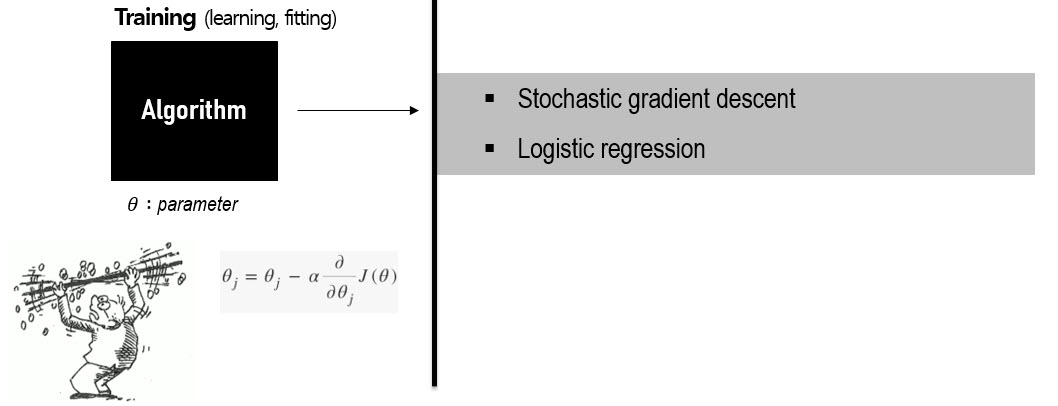

In [2]:
Image(filename='../image/sgd_lgr/intro.jpg', width=width, height=height)

# 1. Gradient Descent with 선형모델
- SGDClassifier는 로지스틱회귀분석, SVM과 같은 선형분류기(Linear classifiers)를 확률적경사하강(Stochastic gradient descent)방법으로 훈련(training).

In [1]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
Y = np.array([1, 1, 2, 2])
X
Y

array([1, 1, 2, 2])

In [2]:
# Always scale the input. The most convenient way is to use a pipeline.
clf = make_pipeline(StandardScaler(),
                    SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(X, Y)

print(clf.predict([[-0.8, -1]]))

[1]


In [3]:
clf.predict_proba([[-0.8, -1]])

AttributeError: probability estimates are not available for loss='hinge'

- https://en.wikipedia.org/wiki/Support-vector_machine

In [7]:
clf.decision_function([[-5.8, -6]])
clf.decision_function([[-0.8, -1]])
clf.decision_function([[0.8, 1]])
clf.decision_function([[8, 9]])

array([-113.60272639])

array([-25.96884129])

array([5.96884129])

array([139.95131451])

default SVC loss='hinge'대신 loss='log'

In [8]:
clf = make_pipeline(StandardScaler(),
                    SGDClassifier(max_iter=1000, loss='log', tol=1e-3))
clf.fit(X, Y)

print(clf.predict_proba([[-0.8, -1]]))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(loss='log'))])

[[9.99993368e-01 6.63186498e-06]]


### Regularization

Automatically created module for IPython interactive environment


<Figure size 500x500 with 0 Axes>

<a list of 1 text.Text objects>

<a list of 1 text.Text objects>

<a list of 1 text.Text objects>

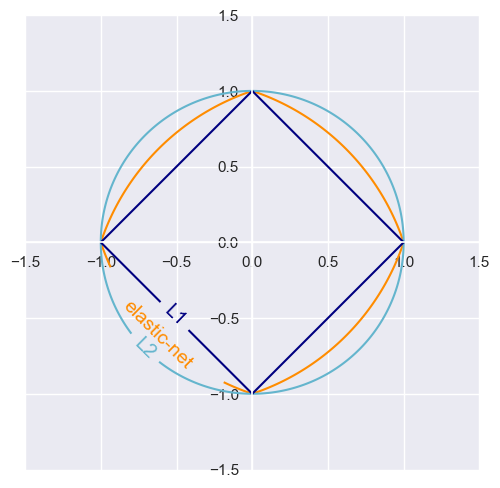

In [9]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

l1_color = "navy"
l2_color = "c"
elastic_net_color = "darkorange"

line = np.linspace(-1.5, 1.5, 1001)
xx, yy = np.meshgrid(line, line)

l2 = xx ** 2 + yy ** 2
l1 = np.abs(xx) + np.abs(yy)
rho = 0.5
elastic_net = rho * l1 + (1 - rho) * l2

plt.figure(figsize=(5, 5), dpi=100)
ax = plt.gca()

elastic_net_contour = plt.contour(xx, yy, elastic_net, levels=[1],
                                  colors=elastic_net_color)
l2_contour = plt.contour(xx, yy, l2, levels=[1], colors=l2_color)
l1_contour = plt.contour(xx, yy, l1, levels=[1], colors=l1_color)
ax.set_aspect("equal")
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')

plt.clabel(elastic_net_contour, inline=1, fontsize=14,
           fmt={1.0: 'elastic-net'}, manual=[(-1, -1)])
plt.clabel(l2_contour, inline=1, fontsize=14,
           fmt={1.0: 'L2'}, manual=[(-1, -1)])
plt.clabel(l1_contour, inline=1, fontsize=14,
           fmt={1.0: 'L1'}, manual=[(-1, -1)])

plt.tight_layout()
plt.show()

## 1.1 Batch Gradient Descent

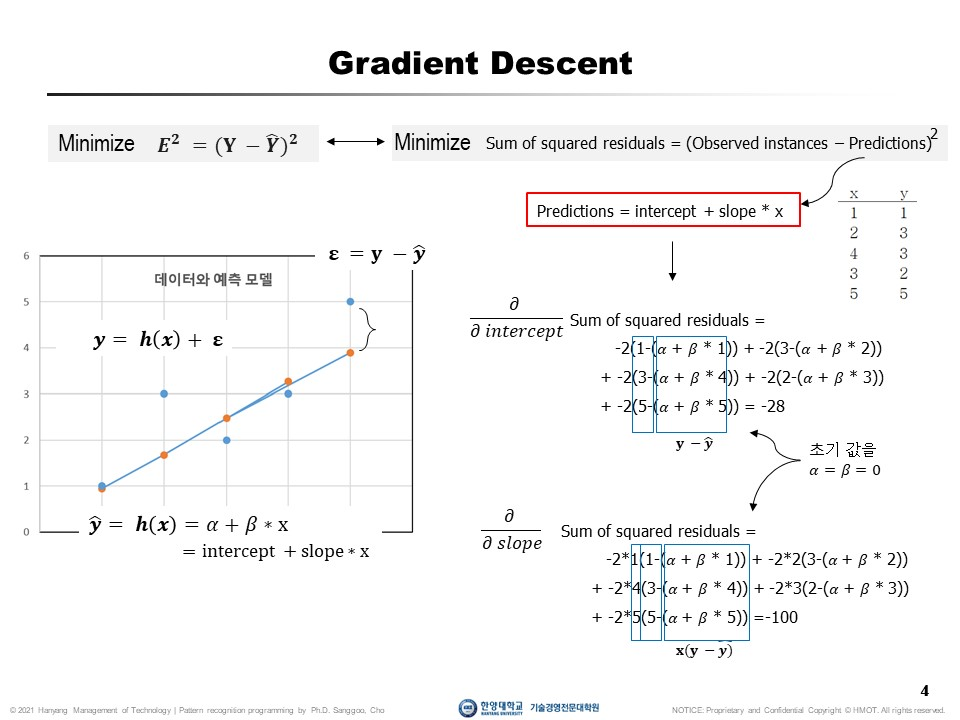

In [10]:
Image(filename='../image/sgd_lgr/슬라이드4.jpg', width=width, height=height)

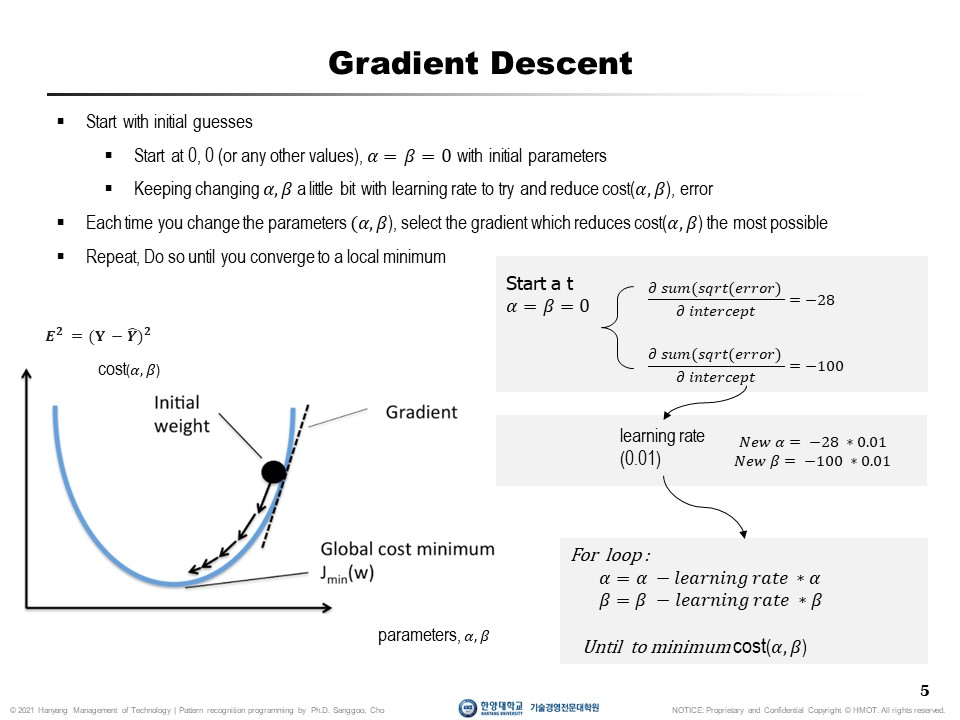

In [11]:
Image(filename='../image/sgd_lgr/슬라이드5.jpg', width=width, height=height)

### Linear regression using batch gradient descent
- parameter(절편과 기울기) MLE(maximum likelihood estimation)

In [ ]:
XtX

In [12]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance (절편)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.86359684],
       [3.02942902]])

In [13]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
X_new_b

array([[1., 0.],
       [1., 2.]])

In [14]:
y_predict = X_new_b.dot(theta_best)

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

(0.0, 2.0, 0.0, 15.0)

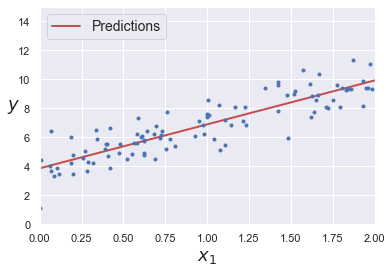

In [15]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [16]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [17]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

<Figure size 720x288 with 0 Axes>

<AxesSubplot:>

Text(0, 0.5, '$y$')

<AxesSubplot:>

<AxesSubplot:>

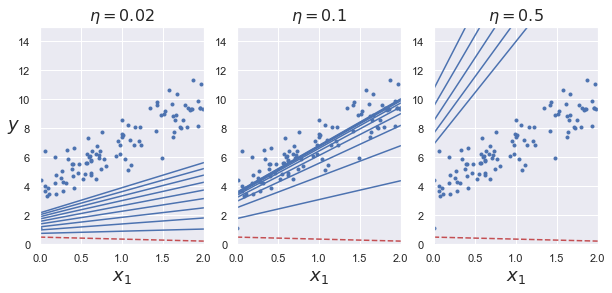

In [18]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

###  Batch gradient descent의 단점

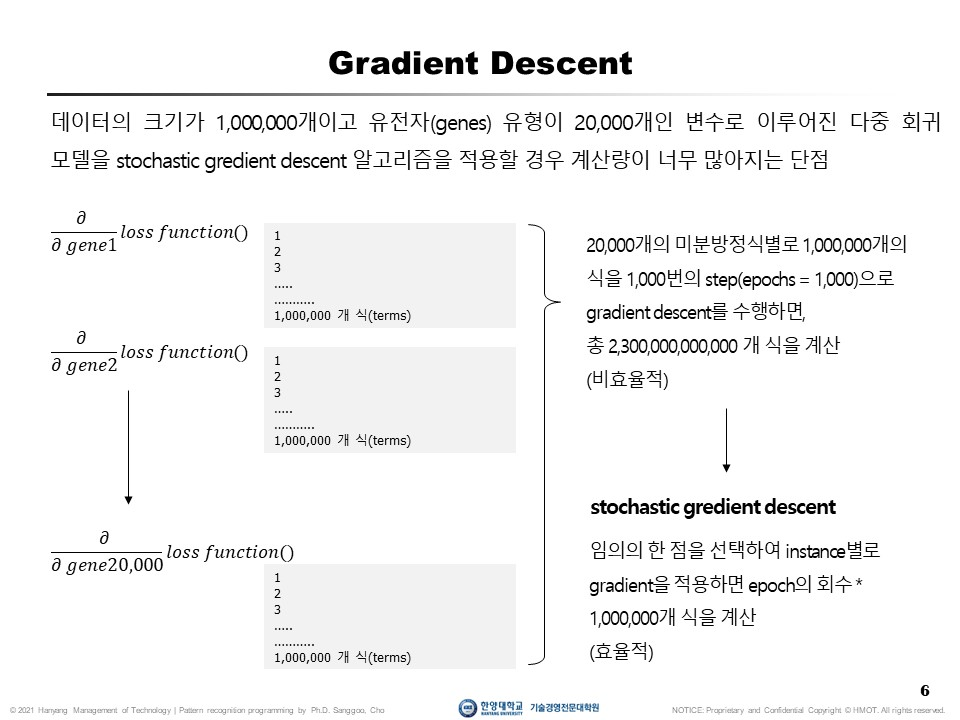

In [19]:
Image(filename='../image/sgd_lgr/슬라이드6.jpg', width=width, height=height)

## 1.2 Stochastic Batch Gradient Descent

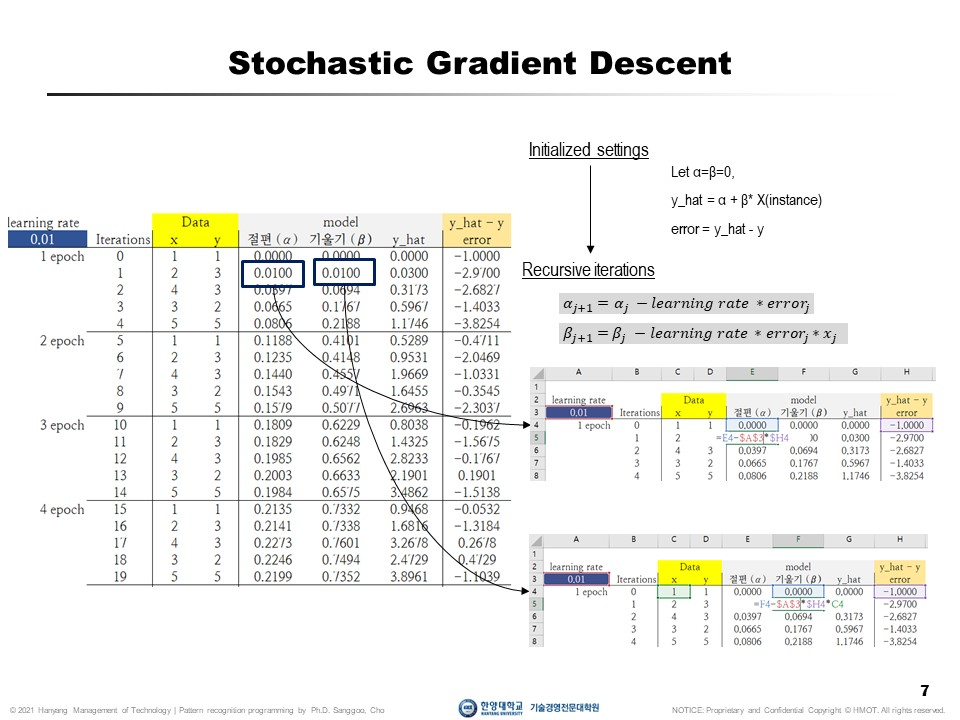

In [20]:
Image(filename='../image/sgd_lgr/슬라이드7.jpg', width=width, height=height)

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

(0.0, 2.0, 0.0, 15.0)

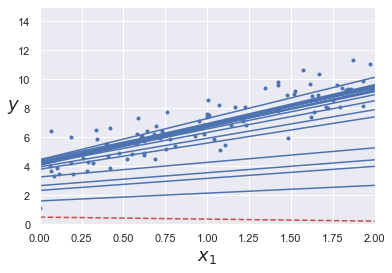

In [21]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
plt.show()                                           # not shown

## 1.3 Mini-batch Gradient Descent
- Minibatch GD computes the gradients on small random sets of instances called minibatches.

In [22]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [23]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, '$\\theta_0$')

Text(0, 0.5, '$\\theta_1$   ')

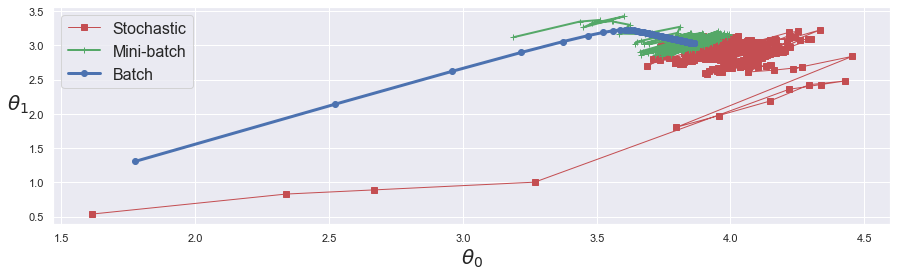

In [24]:
plt.figure(figsize=(15,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
#plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

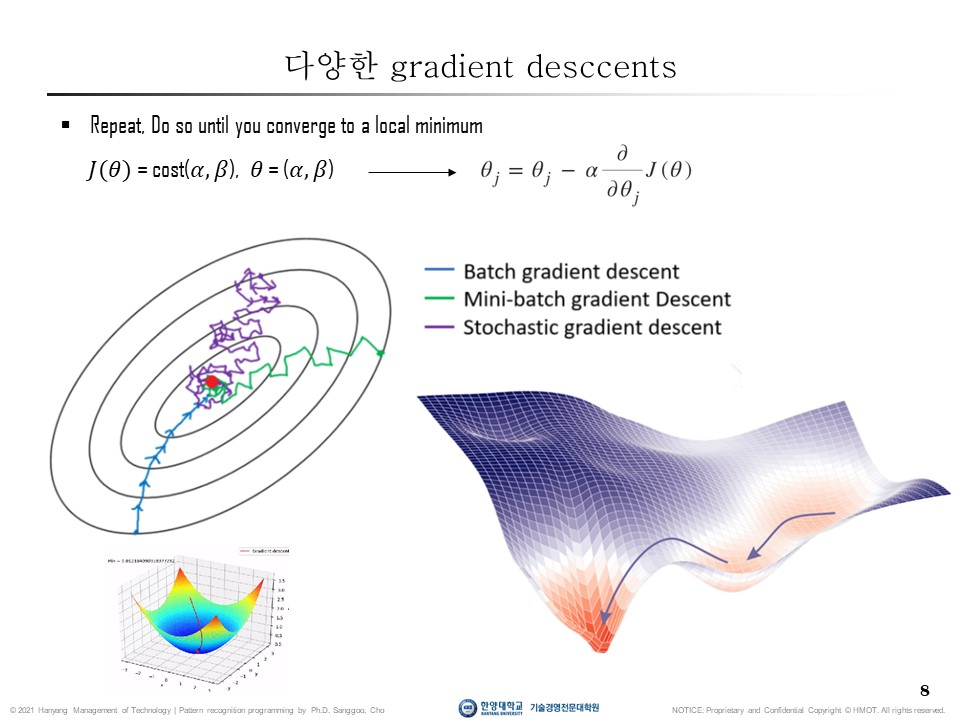

In [25]:
Image(filename='../image/sgd_lgr/슬라이드8.jpg', width=width, height=height)

### 뉴톤  알고리즘(Newton's algorithm) : 2차 미분 gradients --> quick steps

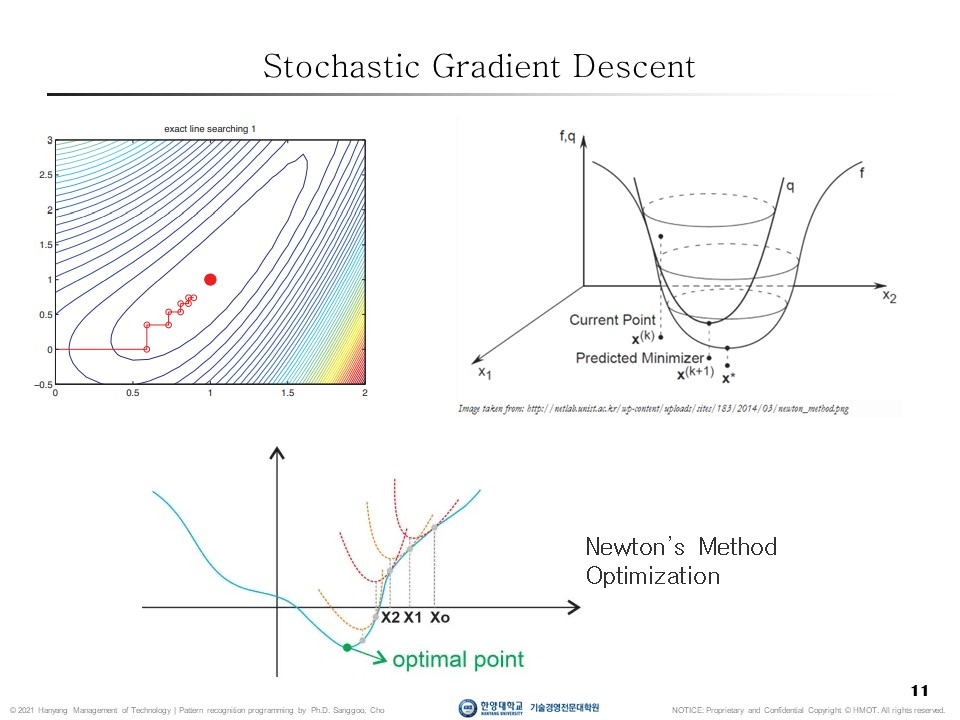

In [26]:
Image(filename='../image/sgd_lgr/슬라이드11.jpg', width=width, height=height)

# sklearn.linear_model.SGDClassifier
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

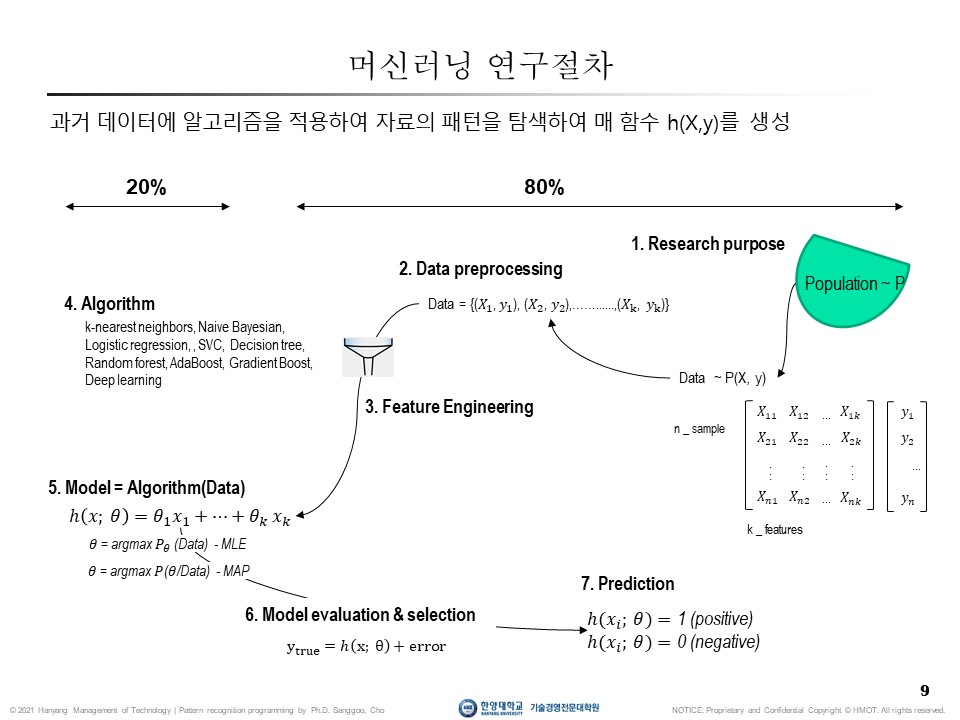

In [27]:
Image(filename='../image/sgd_lgr/슬라이드9.jpg', width=width, height=height)

## [참고] SGD 예제

In [28]:
import pandas as pd
data = pd.DataFrame({'x': [1,2,4,3,5], 'y':[1,3,3,2,5]})
data

,x,y
0,1,1
1,2,3
2,4,3
3,3,2
4,5,5


max_iter을 5, 10, 15, 20으로 fitting 

SGDRegressor(max_iter=30)

SGDRegressor(max_iter=30)

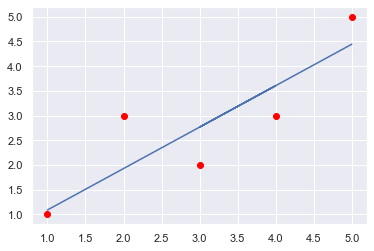

In [29]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(max_iter=30)                  # 1. 모델 객체화 (max_iter --> aka epochs)
model.fit(data['x'].values.reshape(-1,1), data['y'])                                      # 2. 학습하기

model                                            #  학습한 모델 내부 저장
y_pred = model.predict(data['x'].values.reshape(-1,1)) #  
plt.scatter(data['x'], data['y'], color='red')
plt.plot(data['x'], y_pred)

## 알고리즘 (fit, predict) 비교
#### 데이터 불러오기

In [30]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing.feature_names.extend(housing.target_names)
df = pd.DataFrame(np.c_[housing.data, housing.target], columns = housing.feature_names)
#df=df.sample(frac=0.1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [31]:
df.corr()[-1:]

X = df[['MedInc', 'AveRooms']]
y = df['MedHouseVal']

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.02465,-0.023737,-0.14416,-0.045967,1.0


## 1. Ordinary Least Squares (statisitc models API)

In [32]:
import statsmodels.api as sm
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            MedHouseVal   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                          6.805e+04
Date:                Thu, 20 May 2021   Prob (F-statistic):                        0.00
Time:                        14:43:24   Log-Likelihood:                         -26162.
No. Observations:               20640   AIC:                                  5.233e+04
Df Residuals:                   20638   BIC:                                  5.234e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## 2. Regression (scikit learn API)

In [33]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=False) # #print('Intercept: \n', reg.intercept_)

# Train the model using the training sets
regr.fit(X, y)

# Make predictions using the testing set
y_pred = regr.predict(X)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y, y_pred))

LinearRegression(fit_intercept=False)

Coefficients: 
 [0.49376576 0.01487299]
Mean squared error: 0.74
Coefficient of determination: 0.45


## 3. Stochastic gradient descent

In [34]:
from sklearn.linear_model import SGDRegressor       # 알고리즘 불러오고 데이터 준비하기
model = SGDRegressor(max_iter=500)                  # 1. 알고리즘 객체화 (max_iter --> aka epochs)
model.fit(X, y)                                      #  2. 학습하기
model.get_params()                                                #  학습한 모델 내부 저장
y_pred = model.predict(X)                            # 3. 예측하기 (unseen data)
print(f'모델의 Mean squared error는 :{mean_squared_error(y, y_pred).round(4)}')

model.coef_
model.intercept_

SGDRegressor(max_iter=500)

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_loss',
 'max_iter': 500,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

모델의 Mean squared error는 :0.7734


array([0.33095246, 0.00361219])

array([0.55737434])

### SGD: convex loss functions

lossstr, default=’hinge’
The loss function to be used. Defaults to ‘hinge’, which gives a linear SVM.

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier
- https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_loss_functions.html

In [35]:
def modified_huber_loss(y_true, y_pred):
    z = y_pred * y_true
    loss = -4 * z
    loss[z >= -1] = (1 - z[z >= -1]) ** 2
    loss[z >= 1.] = 0
    return loss

(0.0, 8.0)

Text(0.5, 0, 'Decision function $f(x)$')

Text(0, 0.5, '$L(y=1, f(x))$')

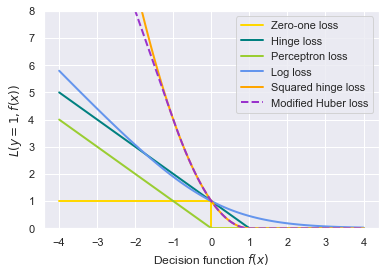

In [36]:
xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)

lw = 2
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], color='gold', lw=lw,
         label="Zero-one loss")

plt.plot(xx, np.where(xx < 1, 1-xx, 0), color='teal', lw=lw,
         label="Hinge loss")

plt.plot(xx, -np.minimum(xx, 0), color='yellowgreen', lw=lw,
         label="Perceptron loss")
plt.plot(xx, np.log2(1 + np.exp(-xx)), color='cornflowerblue', lw=lw,
         label="Log loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0) ** 2, color='orange', lw=lw,
         label="Squared hinge loss")
plt.plot(xx, modified_huber_loss(xx, 1), color='darkorchid', lw=lw,
         linestyle='--', label="Modified Huber loss")
plt.ylim((0, 8))
plt.legend(loc="upper right")
plt.xlabel(r"Decision function $f(x)$")
plt.ylabel("$L(y=1, f(x))$")
plt.show()

## 선형모델
### 0.0 LinearRegression

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
lrg = make_pipeline(StandardScaler(), LinearRegression())
lrg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [38]:
lrg.named_steps

{'standardscaler': StandardScaler(), 'linearregression': LinearRegression()}

In [39]:
lrg.named_steps
lrg.named_steps['linearregression'].intercept_, lrg.named_steps['linearregression'].coef_

{'standardscaler': StandardScaler(), 'linearregression': LinearRegression()}

(0.7380231707288348,
 array([ 1.50554551, -0.18992337, -0.98307252,  0.06004066,  1.98176716]))

### 0.1 서포트벡터 (Support vector machnine)

In [40]:
from sklearn.svm import SVR
svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
svr.fit(X, y)

svr.named_steps
svr.named_steps['svr'].get_params()

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

{'standardscaler': StandardScaler(), 'svr': SVR(epsilon=0.2)}

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.2,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# 1.  선형 모델
## 1.1 선형 회귀 모델(Linear regression model)

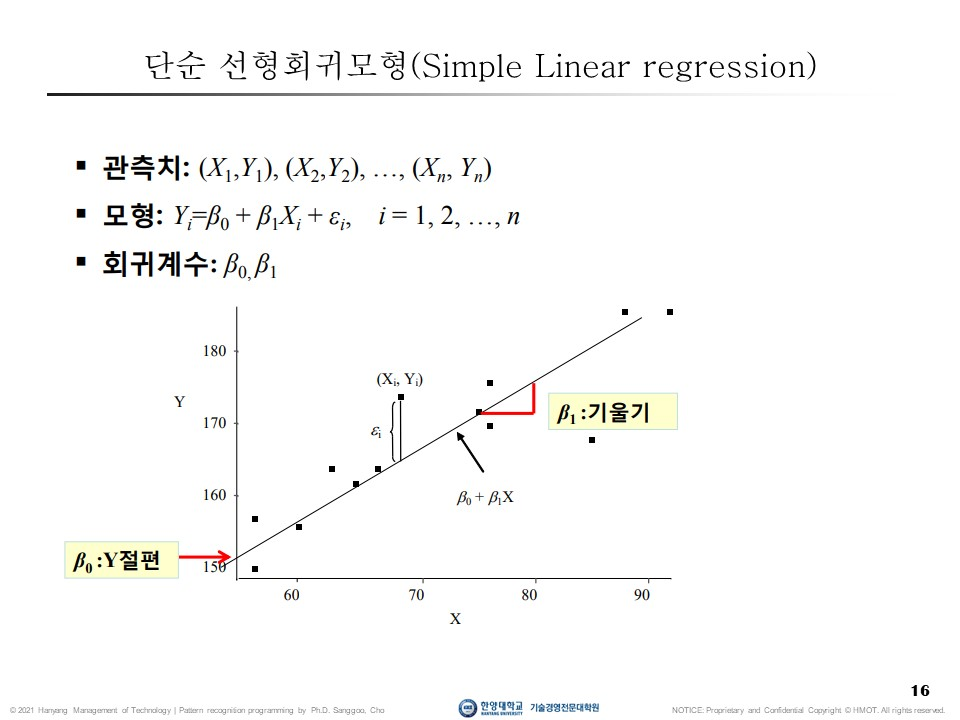

In [41]:
Image(filename='../image/sgd_lgr/슬라이드16.jpg', width=width, height=height)

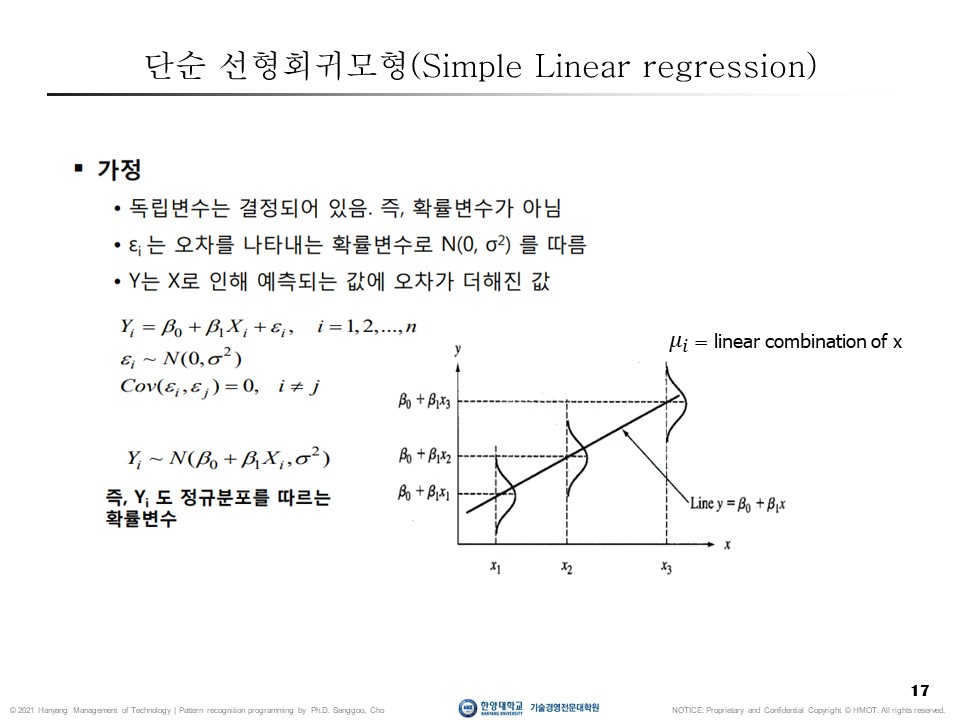

In [42]:
Image(filename='../image/sgd_lgr/슬라이드17.jpg', width=width, height=height)

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

(0.0, 2.0, 0.0, 15.0)

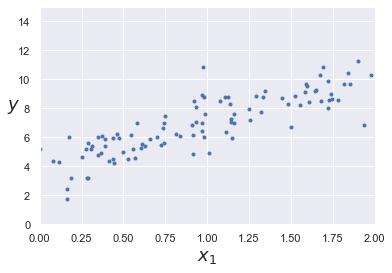

In [43]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

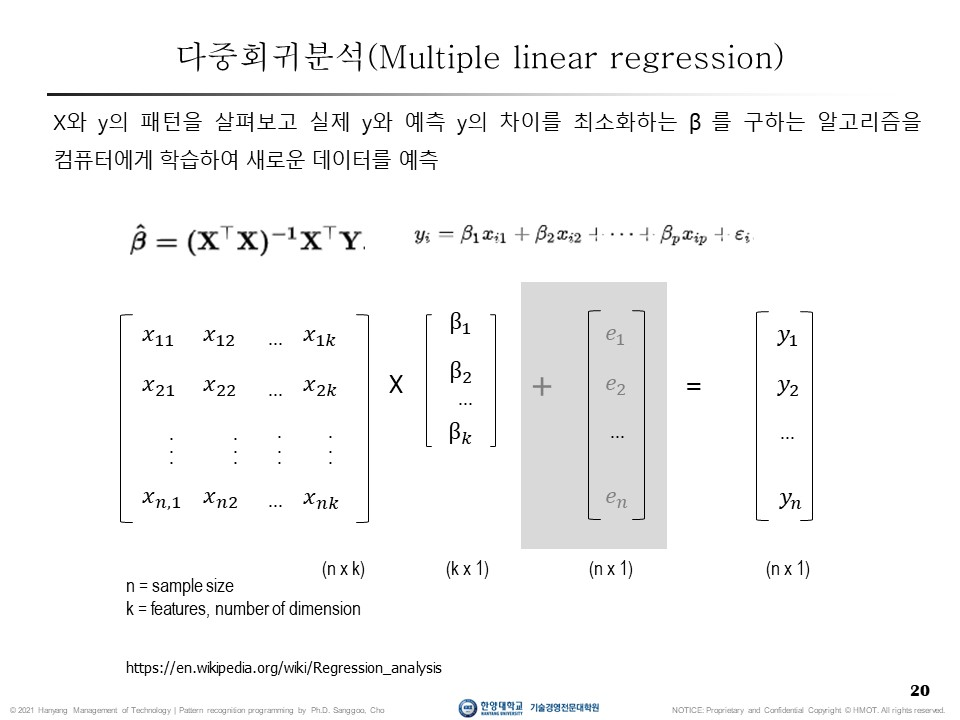

In [44]:
Image(filename='../image/sgd_lgr/슬라이드20.jpg', width=width, height=height)

In [45]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.89344172],
       [3.16065818]])

In [46]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

(0.0, 2.0, 0.0, 15.0)

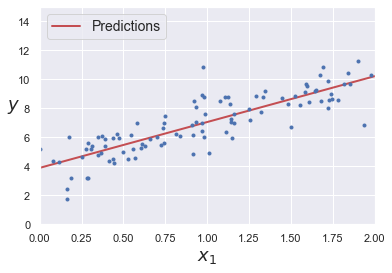

In [47]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

### [참고]  데이터의 특성에 따라 예측을 잘하는 알고리즘이 있음
loss function(sgd의 'hinge loss'과 SVM 손실함수는 동일)은 동일하지만 알고리즘이 달라 예측 성능이 차이가 발생

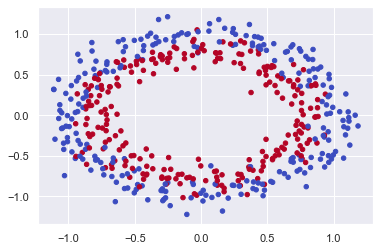

In [48]:
from sklearn.datasets.samples_generator import make_blobs, make_circles, make_moons
#X, y = make_blobs(n_samples=5000, centers=2, random_state=0, cluster_std=0.60)
#X, y = make_moons(n_samples=500, noise=0.1)
X, y = make_circles(n_samples=500, noise=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='coolwarm');

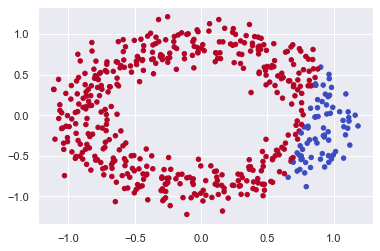

In [49]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(max_iter=1000)                  # 1. 모델 객체화 (max_iter --> aka epochs)
model.fit(X, y)                                      # 2. 학습하기 
y_pred = model.predict(X) # 
y_pred
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, cmap='coolwarm');

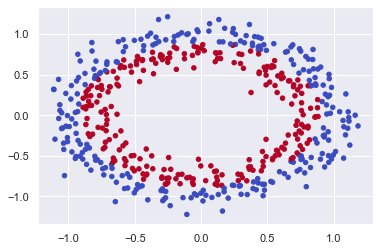

In [50]:
from sklearn.svm import SVC 
model = SVC(kernel='rbf')
model.fit(X, y)
y_pred = model.predict(X) # 
y_pred
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, cmap='coolwarm');

# End